# Edge Detection


In [1]:
from utils import *
from skimage import filters

%matplotlib inline
%load_ext autoreload
%autoreload 2

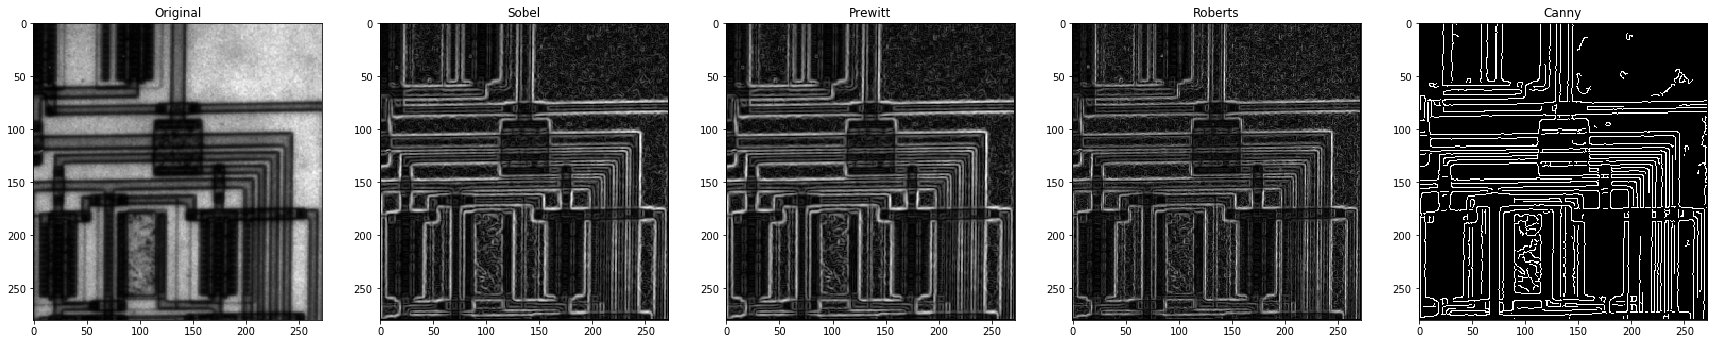

In [2]:
'''
Built-in Sobel, Prewill, Roberts
'''

img = rgb2gray(io.imread('./images/circuit.tif'))

sobel_img = filters.sobel(img)
prewitt_img = filters.prewitt(img)
roberts_img = filters.roberts(img)
canny_img = canny(img)

show_images([img, sobel_img, prewitt_img, roberts_img, canny_img], ['Original', 'Sobel', 'Prewitt', 'Roberts', 'Canny'])

In [3]:
'''
Custom Sobel (V-H-Both)
'''
def apply_sobel(img):
    hy = np.array([[-1,0,1], [-2,0,2], [-1,0,1]])
    hx = np.array([[-1,-2,-1], [0,0,0], [1,2,1]])

    sobel_v = convolve2d(img, hy)
    sobel_h = convolve2d(img, hx)
    sobel_img = np.sqrt(sobel_v **2 + sobel_h**2)
    
    return sobel_v, sobel_h, sobel_img

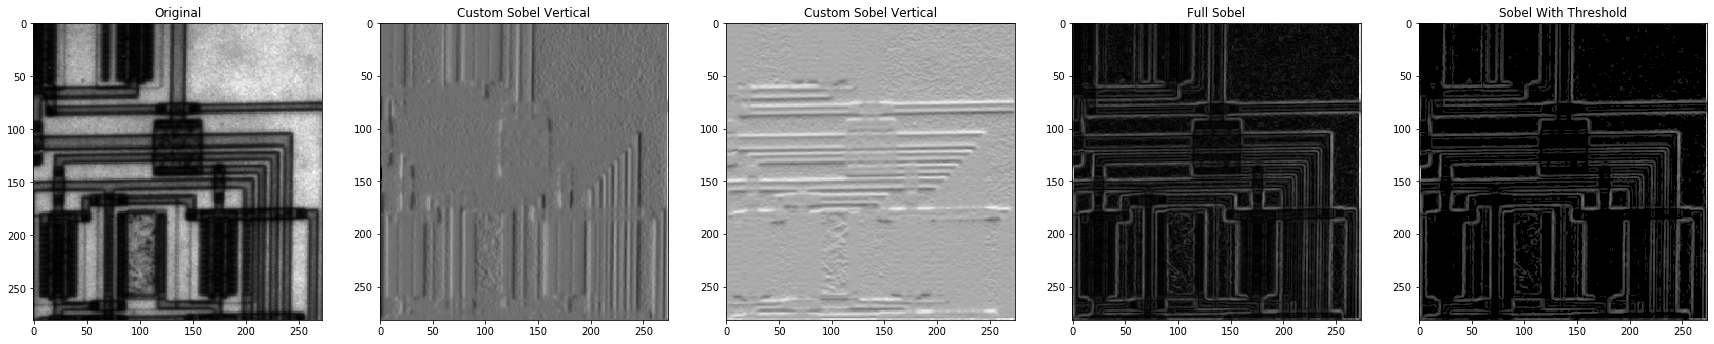

In [4]:
# apply sobel
img = rgb2gray(io.imread('./images/circuit.tif'))
sobel_v, sobel_h, sobel_img = apply_sobel(img)

# sobel with threshold
threshold = np.mean(sobel_img)
mask = sobel_img > threshold
sobel_w_thresh = np.zeros(sobel_img.shape)
sobel_w_thresh[mask] = sobel_img[mask]

# plotting result images
show_images([img, sobel_v, sobel_h, sobel_img, sobel_w_thresh], 
    ['Original', 'Custom Sobel Vertical', 'Custom Sobel Vertical', 'Full Sobel', 'Sobel With Threshold'])

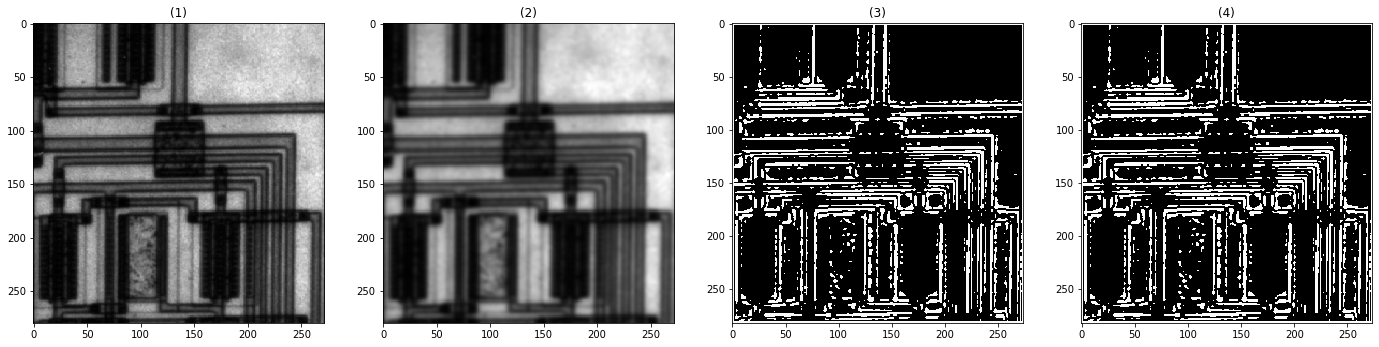

In [5]:
'''
Custom LoG
'''
img = rgb2gray(io.imread('./images/circuit.tif'))
img_wo_noise = filters.gaussian(image=img, sigma=1.5)

eight_neighbors_filter = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
four_neighbors_filter = np.array([[0,1,0],[1,-4,1],[0,1,0]])

img_w_filter1 = abs(convolve2d(img_wo_noise, eight_neighbors_filter))
img_w_filter2 = abs(convolve2d(img_wo_noise, four_neighbors_filter))

mask = img_w_filter1 > np.mean(img_w_filter1)
img_w_filter1_threshold = np.zeros(img_w_filter1.shape)
img_w_filter1_threshold[mask] = img_w_filter1[mask]+100

mask2 = img_w_filter2 < np.mean(img_w_filter2)
img_w_filter2_threshold = np.zeros(img_w_filter2.shape)
img_w_filter2_threshold[mask] = img_w_filter2[mask]+100

show_images([img, img_wo_noise, img_w_filter1_threshold, img_w_filter2_threshold])